29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


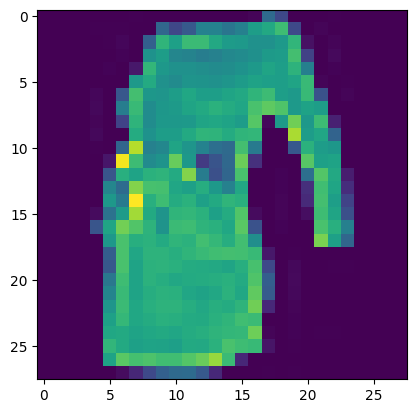

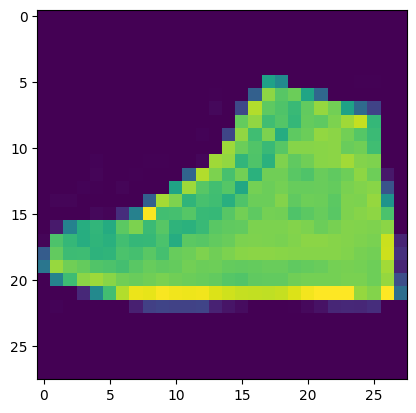

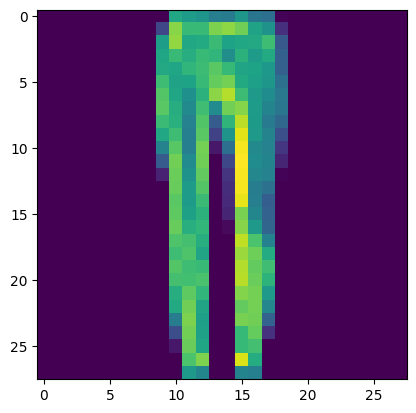

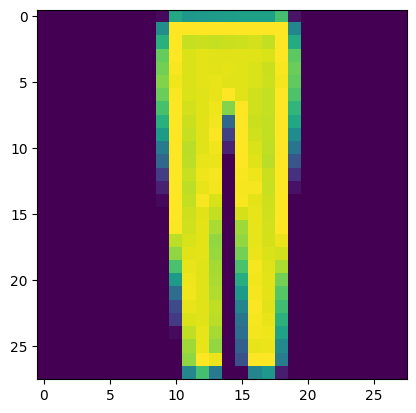

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - loss: 0.6571 - sparse_categorical_accuracy: 0.7671 - val_loss: 0.3246 - val_sparse_categorical_accuracy: 0.8863
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - loss: 0.2959 - sparse_categorical_accuracy: 0.8935 - val_loss: 0.2918 - val_sparse_categorical_accuracy: 0.8922
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 46ms/step - loss: 0.2424 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.2638 - val_sparse_categorical_accuracy: 0.9038
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Accuracy score is 90.38000000000001 %
Confusion matrix of Neural Network is 
 [[861   0  17  16   4   1  95   0   6   0]
 [  1 987   0  10   1   0   0   0   1   0]
 [ 15   1 823   5 120   0  35   0   1   0]
 [ 17   3  13 916  24   0  27   0   0   0]
 [  0   1  37  25 904   0  33   0   0   0]
 [  0   0   0   0   0 979   1   5   2  13]
 [124   2  74  27 102   0 664   0   7   0]
 [  0   0   0   0   0  10   0 938   1  51]
 [  4   1   2   2   3   0   

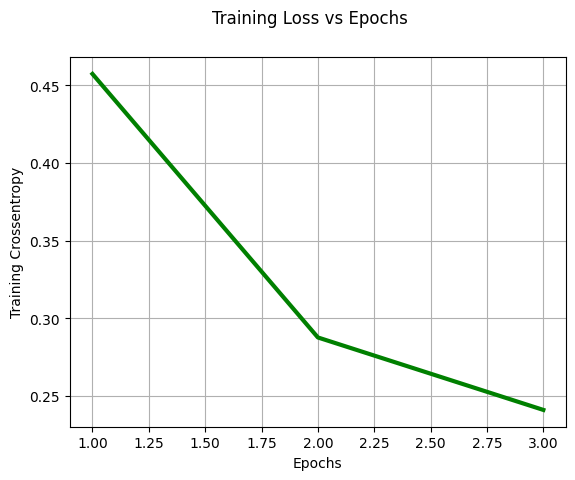

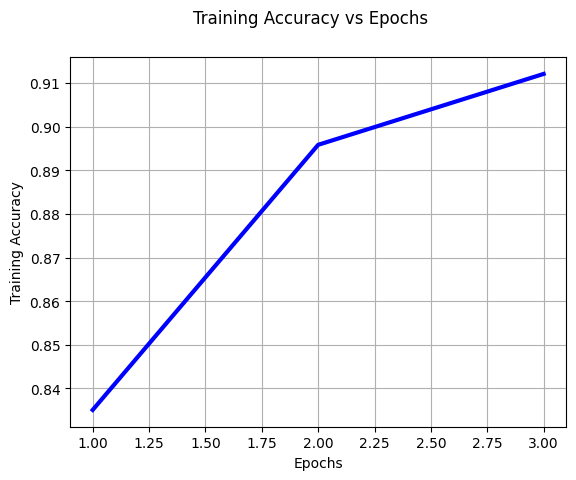

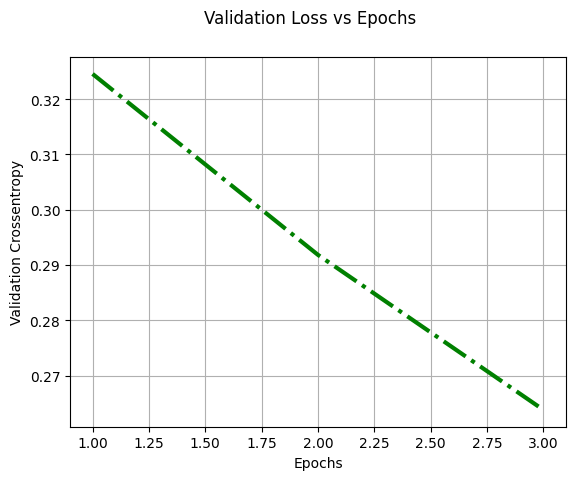

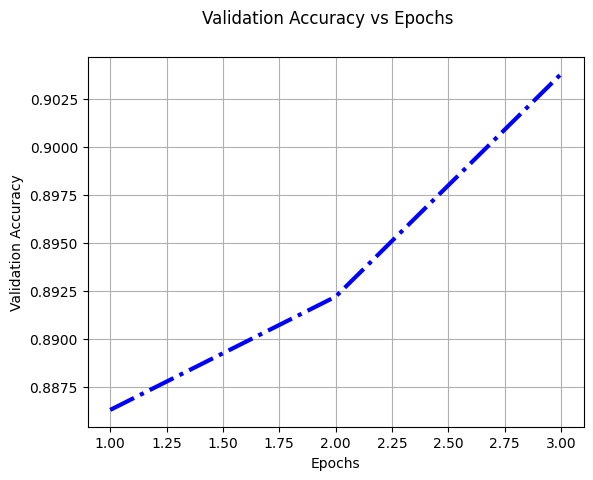

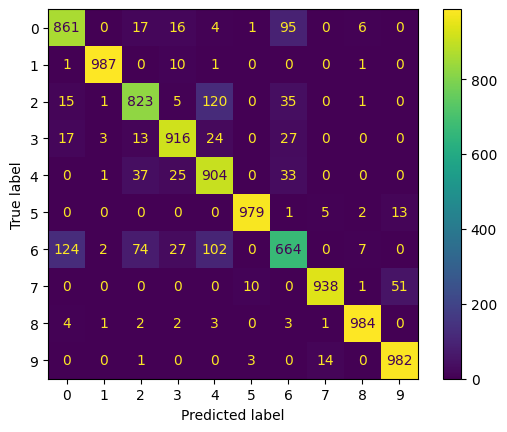

In [2]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()


#Fashion-MNIST is a dataset of Zalando's article images—consisting of a
#training set of 60,000 examples and a test set of 10,000 examples.
#Each example is a 28x28 grayscale image, associated with a label from 10 classes.


#Each training and test example is assigned to one of the following labels:


#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot


#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()


plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()


plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()


plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()




Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)


Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(Xtrain, ytrain,epochs=3, validation_data=(Xtest, ytest))


ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)


score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')




cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')




plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['sparse_categorical_accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_sparse_categorical_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
